In [36]:
import preprocessingFuncts as pp
import pandas
import matplotlib.pyplot as plt

<h3>Reading the ratings data</h3>
Returns a pandas data frame with cleaned data from u.data

In [43]:
ratings = pp.readRatingData()
ratings = ratings.sort_values(by=['user_id','item_id']).reset_index().drop('index',axis=1)
ratings[0:10]

,user_id,item_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
5,1,6,5
6,1,7,4
7,1,8,1
8,1,9,5
9,1,10,3


<h3>Reading the item data</h3>
Returns a pandas data frame with cleaned data from u.item (no title, sry, thought it's not important)

      Animation
year           
1922          1
1926          1
1930          1
1931          1
1932          1
...         ...
1994        214
1995        219
1996        355
1997        286
1998         65

[71 rows x 1 columns]


ValueError: x and y must have same first dimension, but have shapes (1681,) and (71, 1)

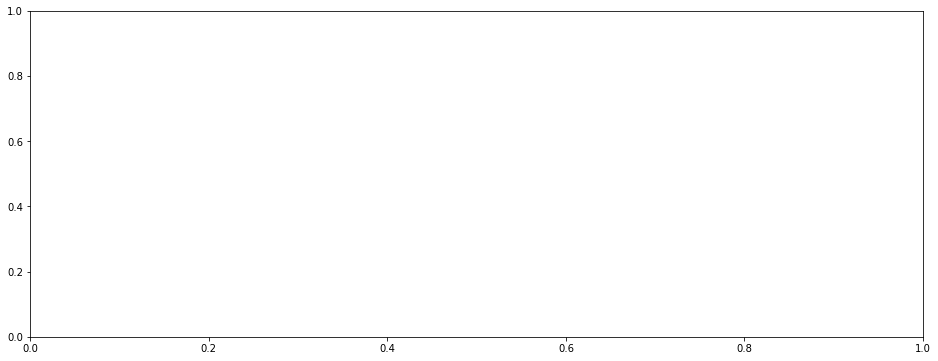

In [5]:
items = pp.readItemData()
items = items.sort_values(by=['year','item_id']).reset_index().drop('index',axis=1)
items = items.dropna()

# print(items.columns)
count=0
yearnow=0
for i in range(len(items)):
    if(yearnow!=items['year'][i]):
        count+=1
        yearnow=items['year'][i]

# print(items)
# print(items.iloc[:,1])
temp = list(items.iloc[:,13])

# temp2 = list(items.iloc[:,1].map(lambda x: int(x)))
# print(temp2)
# plt.figure(figsize=(16,6))
# plt.bar(items.iloc[:,1],items.iloc[:,13])
# plt.xticks(rotation = 90)
# plt.show()

items = items.drop('item_id',axis=1)
temp3 = items.groupby(by=[items.columns[5],'year']).count()
temp3

j=4
for i in range(0,19):
    temp3 = items.loc[:,[items.columns[j],'year']].groupby(by='year').count()
    plt.figure(figsize=(16,6))
    print(temp3)
    plt.plot(items.iloc[:,1],temp3)
    j+=1
    plt.xticks(rotation = 90)
    plt.title(items.iloc[:,j].name)
    plt.show()

<h3>Reading the user data</h3>
Returns a pandas data frame with cleaned data from u.user. Occupation and gender column's contents are now nominal.

In [35]:
users = pp.readUserData()
users = users.sort_values(by=['user_id','age']).reset_index().drop('index',axis=1)
users

,user_id,age,gender,occupation,zip_code,age_category
0,1,24,1,19,85711,3
1,2,53,0,13,94043,6
2,3,23,1,20,32067,3
3,4,24,1,19,43537,3
4,5,33,0,13,15213,4
...,...,...,...,...,...,...
938,939,26,0,18,33319,3
939,940,32,1,0,02215,4
940,941,20,1,18,97229,2
941,942,48,0,10,78209,5


<h3>Specifying data to analyze based on user</h3>
Returns a pandas data frame with the user_id, item_id, rating and any specified category from the user attributes. takes input from user data and ratings data

In [6]:
pp.specifyByUserData(users, ratings, ["gender"]).head()

,user_id,gender,item_id,rating
0,1,1,61,4
1,1,1,189,3
2,1,1,33,4
3,1,1,160,4
4,1,1,20,4


<h3>Specifying data to analyze based on item</h3>
Returns a pandas data frame with the item_id, item_id, rating and any specified category(only between "year" and "genre") from the item attributes, takes input from user data and ratings data

In [7]:
pp.specifyByItemData(items, ratings, "year").head()

,item_id,year,user_id,rating
0,1,1995,308,4
1,1,1995,287,5
2,1,1995,148,4
3,1,1995,280,4
4,1,1995,66,3
